# **Capstone Project 1**
**Dataset:** Meta (facebook), twitter, snapchat, etsy, pinterest daily stock prices from 2012-2022

kaggle: https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022/data

source: https://finance.yahoo.com/

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/social media stocks 2012-2022.csv')
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0
...,...,...,...,...,...,...,...,...
8393,2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0
8394,2022-04-06,TWTR,50.770000,50.770000,52.869999,49.299999,50.040001,158865600.0
8395,2022-04-06,PINS,24.440001,24.440001,25.559999,23.870001,25.559999,12274200.0
8396,2022-04-06,SNAP,36.470001,36.470001,37.740002,35.639999,37.369999,21549700.0


In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8398 non-null   object 
 1   Symbol     8398 non-null   object 
 2   Adj Close  8398 non-null   float64
 3   Close      8398 non-null   float64
 4   High       8398 non-null   float64
 5   Low        8398 non-null   float64
 6   Open       8398 non-null   float64
 7   Volume     8398 non-null   float64
dtypes: float64(6), object(2)
memory usage: 525.0+ KB


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0
...,...,...,...,...,...,...,...,...
8393,2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0
8394,2022-04-06,TWTR,50.770000,50.770000,52.869999,49.299999,50.040001,158865600.0
8395,2022-04-06,PINS,24.440001,24.440001,25.559999,23.870001,25.559999,12274200.0
8396,2022-04-06,SNAP,36.470001,36.470001,37.740002,35.639999,37.369999,21549700.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date', 'Symbol'])
print(df)
df.info()

                    Adj Close       Close        High         Low        Open  \
Date       Symbol                                                               
2012-05-18 FB       38.230000   38.230000   45.000000   38.000000   42.049999   
2012-05-21 FB       34.029999   34.029999   36.660000   33.000000   36.529999   
2012-05-22 FB       31.000000   31.000000   33.590000   30.940001   32.610001   
2012-05-23 FB       32.000000   32.000000   32.500000   31.360001   31.370001   
2012-05-24 FB       33.029999   33.029999   33.209999   31.770000   32.950001   
...                       ...         ...         ...         ...         ...   
2022-04-06 FB      223.300003  223.300003  228.990005  221.410004  226.910004   
           TWTR     50.770000   50.770000   52.869999   49.299999   50.040001   
           PINS     24.440001   24.440001   25.559999   23.870001   25.559999   
           SNAP     36.470001   36.470001   37.740002   35.639999   37.369999   
           ETSY    125.47000

# **Price Trend Analysis**
# Comparative Line Plot
 A line plot showing the adjusted closing prices for all stocks over time. This allows for easy comparison of price trends across different companies.

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()

symbols = df.index.get_level_values('Symbol').unique()

for symbol in symbols:
    data = df.xs(symbol, level='Symbol')

    fig.add_trace(go.Scatter(
        x=data.index,
        y=data['Adj Close'],
        mode='lines',
        name=symbol
    ))

fig.update_layout(
    title='Stock Price Trends',
    xaxis_title='Date',
    yaxis_title='Adjusted Closing Price',
    legend_title='Symbol',
    hovermode='x unified'
)

fig.show()

# Volume Analysis
a stacked bar chart to compare trading volumes across stocks

In [ ]:
df['Year'] = df.index.get_level_values(0).year
df_FB = df[(df['Year']== 2013) & (df.index.get_level_values(1)== 'FB')]
df_FB



,,Adj Close,Close,High,Low,Open,Volume,Year
Date,Symbol,,,,,,,
2013-01-02,FB,28.000000,28.000000,28.180000,27.420000,27.440001,69846400.0,2013
2013-01-03,FB,27.770000,27.770000,28.469999,27.590000,27.879999,63140600.0,2013
2013-01-04,FB,28.760000,28.760000,28.930000,27.830000,28.010000,72715400.0,2013
2013-01-07,FB,29.420000,29.420000,29.790001,28.650000,28.690001,83781800.0,2013
2013-01-08,FB,29.059999,29.059999,29.600000,28.860001,29.510000,45871300.0,2013
...,...,...,...,...,...,...,...,...
2013-12-24,FB,57.959999,57.959999,58.580002,56.910000,58.270000,46617800.0,2013
2013-12-26,FB,57.730000,57.730000,58.380001,57.369999,58.320000,55101000.0,2013
2013-12-27,FB,55.439999,55.439999,57.680000,55.250000,57.480000,60466000.0,2013


it is safe to say

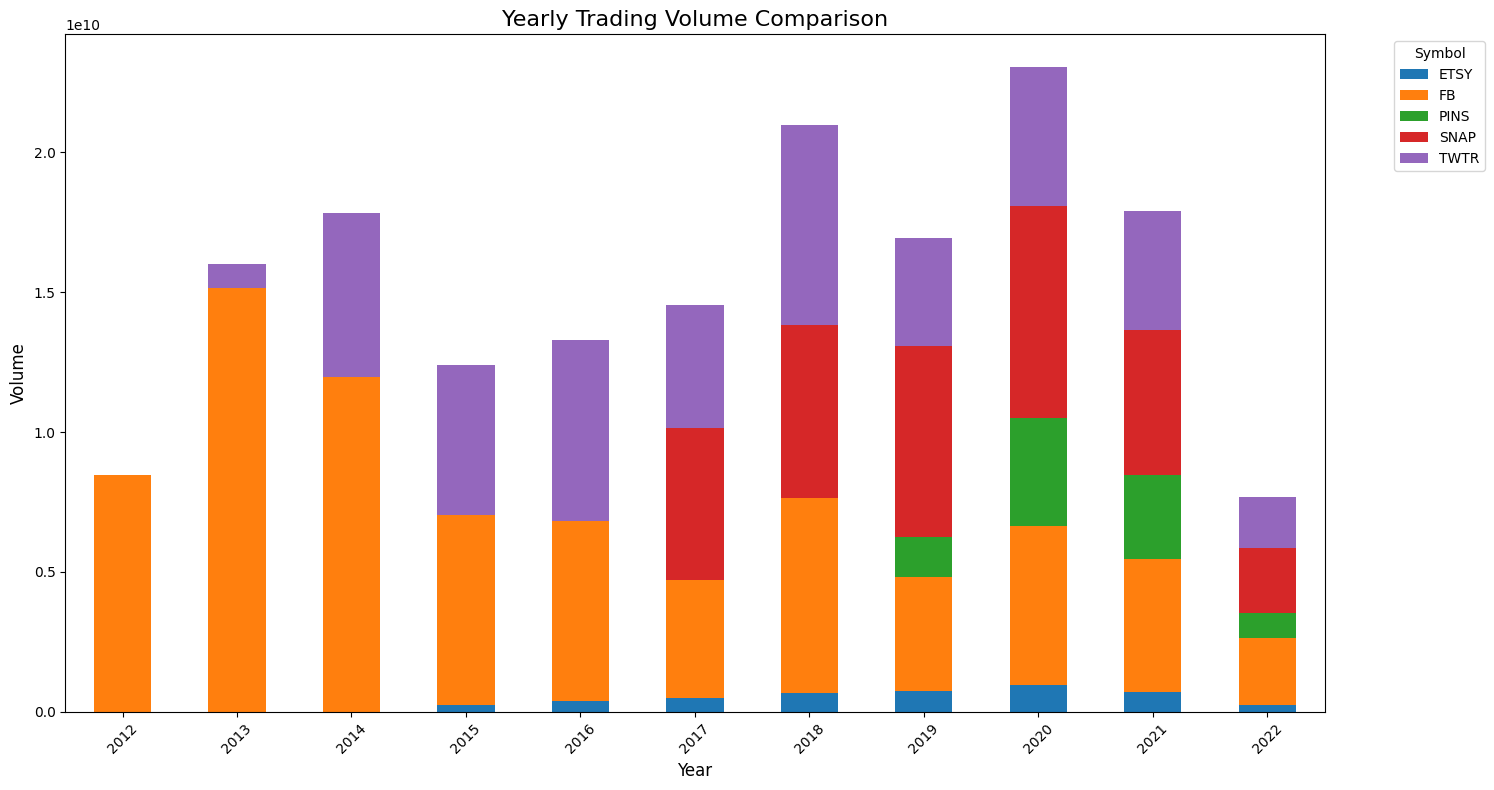

In [ ]:
yearly_volume = df.groupby(['Year', 'Symbol'])['Volume'].sum().unstack()

ax = yearly_volume.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Yearly Trading Volume Comparison', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# Correlation Heatmap
A correlation matrix of stock returns visualized as a heatmap:

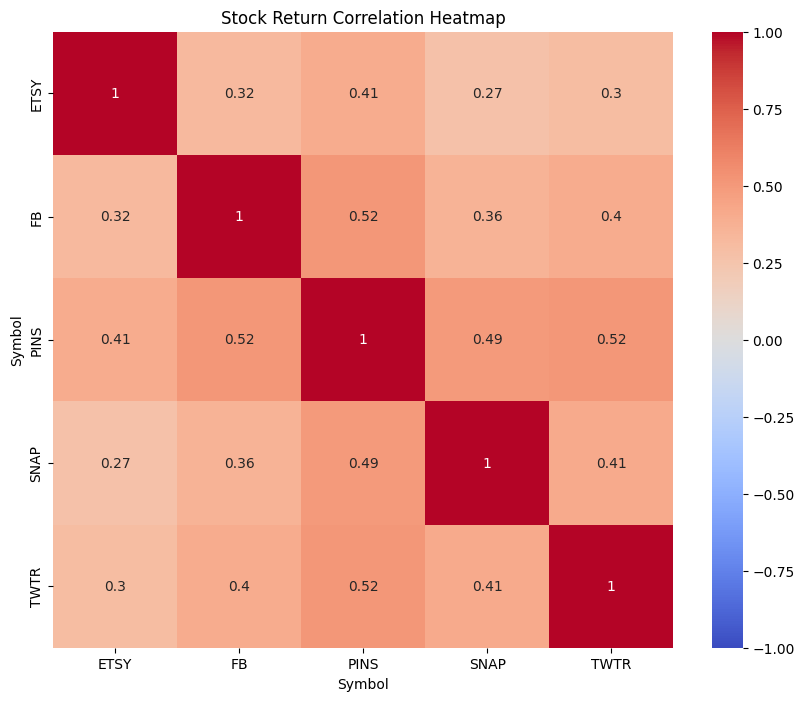

In [ ]:
import seaborn as sns

df_reset = df.reset_index()
df_reset = df_reset.set_index('Date')

returns = df_reset.pivot(columns='Symbol', values='Adj Close').pct_change()
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Stock Return Correlation Heatmap')
plt.show()

# Cumulative Returns
cumulative returns for each stock

In [ ]:
cumulative_returns = (1 + returns).cumprod()

fig = go.Figure()

for column in cumulative_returns.columns:
    fig.add_trace(go.Scatter(
        x=cumulative_returns.index,
        y=cumulative_returns[column],
        mode='lines',
        name=column
    ))

fig.update_layout(
    title='Cumulative Returns',
    xaxis_title='Date',
    yaxis_title='Cumulative Return',
    legend_title='Symbol',
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    )
)

fig.add_vline(x='2020-11-04', line_width=1, line_dash="solid", line_color="red")
fig.add_annotation(
        x='2020-11-04',
        y=1,
        text="US Election",
        showarrow=False,
        textangle=-90,
        yshift=310,
        font=dict(size=10)
    )

fig.add_vline(x='2021-01-07', line_width=1, line_dash="solid", line_color="yellow")
fig.add_annotation(
        x='2021-01-07',
        y=1,
        text="US Coup",
        showarrow=False,
        textangle=-90,
        yshift=310,
        font=dict(size=10)
    )

cumulative_returns['Year'] = cumulative_returns.index.get_level_values(0).year
cumulative_returns['Month'] = cumulative_returns.index.get_level_values(0).month
print(cumulative_returns[(cumulative_returns['Year']== 2020) & (cumulative_returns['Month']== 11)])

fig.show()

Symbol          ETSY        FB      PINS      SNAP      TWTR  Year  Month
Date                                                                     
2020-11-02  4.214667  6.836516  2.392623  1.666258  0.879065  2020     11
2020-11-03  4.348333  6.939576  2.441803  1.681781  0.929399  2020     11
2020-11-04  4.540000  7.517133  2.518443  1.715278  0.952338  2020     11
2020-11-05  4.788000  7.708083  2.601230  1.697304  0.973497  2020     11
2020-11-06  4.876000  7.674863  2.653279  1.853758  0.960356  2020     11
2020-11-09  4.040000  7.291917  2.366803  1.678922  0.961915  2020     11
2020-11-10  3.981000  7.126079  2.281557  1.574346  0.944543  2020     11
2020-11-11  4.353000  7.232017  2.440574  1.571078  0.971715  2020     11
2020-11-12  4.234333  7.195396  2.469672  1.646242  0.953452  2020     11
2020-11-13  4.164000  7.244311  2.554098  1.651552  0.968374  2020     11
2020-11-16  4.187333  7.296887  2.566393  1.596405  0.951670  2020     11
2020-11-17  4.294000  7.193304  2.5963

# Returns Analysis
## Daily Returns Distribution

This code will create a separate histogram for each stock, showing the distribution of daily returns. It also adds vertical lines for the mean and one standard deviation above and below the mean.

The histograms will visualize the distribution of daily returns for each stock. Here's what to look for:
- Shape of the distribution: A normal distribution would be symmetrical and bell-shaped. Skewness or fat tails might indicate non-normal behavior.
- Center of the distribution: This represents the average daily return.
- Spread of the distribution: This shows the volatility of the returns.
- Outliers: Extreme values that fall far from the center of the distribution

This analysis can help you understand the risk and return characteristics of each stock, which is crucial for making informed investment decisions.

In [ ]:
df['Daily Return'] = df.groupby('Symbol')['Adj Close'].pct_change()

symbols = df.index.get_level_values('Symbol').unique()

fig = make_subplots(rows=len(symbols), cols=1,
                    subplot_titles=[f'{symbol} Daily Returns' for symbol in symbols],
                    vertical_spacing=0.05)

for i, symbol in enumerate(symbols, start=1):
    stock_returns = df[df.index.get_level_values(1) == symbol]['Daily Return'].dropna()

    hist, bin_edges = np.histogram(stock_returns, bins=50)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    fig.add_trace(
        go.Bar(x=bin_centers, y=hist, name=f'{symbol} Returns'),
        row=i, col=1
    )

    mean = stock_returns.mean()
    std = stock_returns.std()

    fig.add_vline(x=mean, line_dash="dash", line_color="red",
                  annotation_text=f"Mean: {mean:.3f}",
                  annotation_position="top left",
                  row=i, col=1)

    fig.add_vline(x=mean + std, line_dash="dash", line_color="green",
                  annotation_text=f"Std Dev: {std:.4f}",
                  annotation_position="top right",
                  row=i, col=1)

    fig.add_vline(x=mean - std, line_dash="dash", line_color="green",
                  row=i, col=1)

fig.update_layout(
    height=600 * len(symbols),
    width=1000,
    title_text="Distribution of Daily Returns by Stock",
    showlegend=False
)

fig.update_xaxes(title_text="Daily Return")
fig.update_yaxes(title_text="Frequency")

fig.show()

In [ ]:
for symbol in symbols:
    stock_returns = df[df['Symbol'] == symbol]['Daily Return'].dropna()
    print(f"\nSummary statistics for {symbol}:")
    print(stock_returns.describe())


Summary statistics for FB:
count    2487.000000
mean        0.000994
std         0.023821
min        -0.263901
25%        -0.009606
50%         0.000981
75%         0.012534
max         0.296115
Name: Daily Return, dtype: float64

Summary statistics for TWTR:
count    2117.000000
mean        0.000641
std         0.033934
min        -0.241625
25%        -0.014404
50%         0.000611
75%         0.015245
max         0.271178
Name: Daily Return, dtype: float64

Summary statistics for ETSY:
count    1757.000000
mean        0.001543
std         0.038294
min        -0.283411
25%        -0.016608
50%         0.000582
75%         0.020126
max         0.306001
Name: Daily Return, dtype: float64

Summary statistics for SNAP:
count    1284.000000
mean        0.001288
std         0.045513
min        -0.265877
25%        -0.019124
50%        -0.000575
75%         0.019564
max         0.588163
Name: Daily Return, dtype: float64

Summary statistics for PINS:
count    748.000000
mean       0.000942


# Volatility Analysis
Calculate and plot the stock's volatility over time

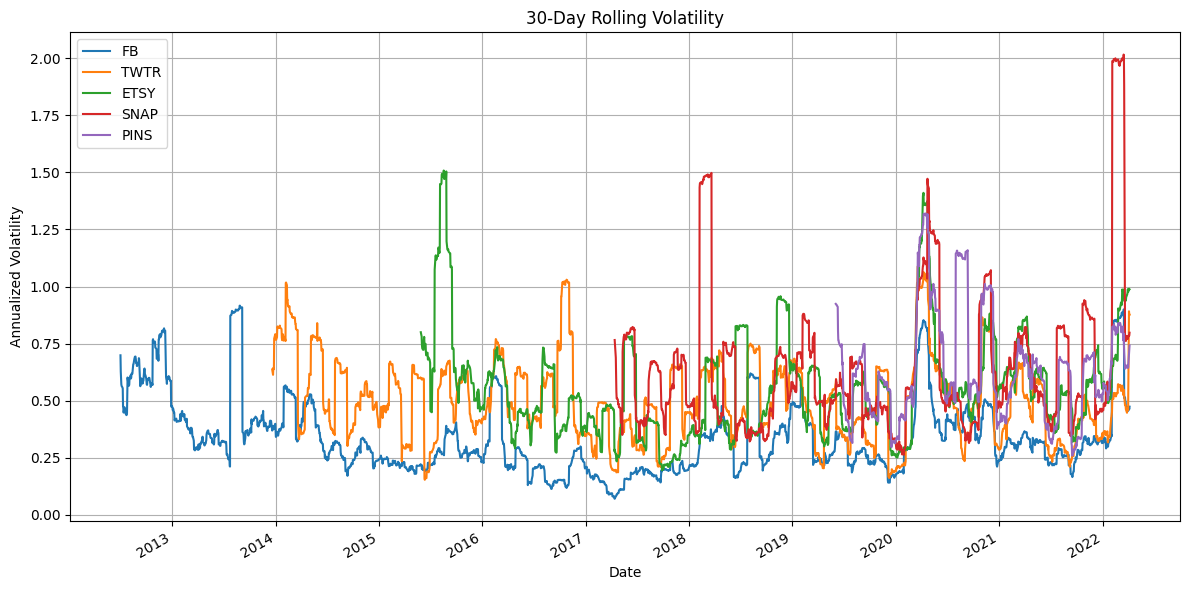

In [ ]:
window = 30

def calculate_volatility(group, window=30):
    return group['Daily Return'].rolling(window=window).std() * np.sqrt(252)

df['Volatility'] = df.groupby('Symbol').apply(lambda x: calculate_volatility(x, window)).reset_index(level=0, drop=True)

plt.figure(figsize=(12, 6))

symbols = df.index.get_level_values('Symbol').unique()

for symbol in symbols:
    stock_volatility = df.xs(symbol, level='Symbol')
    plt.plot(stock_volatility.index, stock_volatility['Volatility'], label=symbol)

plt.title(f'{window}-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()
